In [6]:
import pandas as pd
import io
import requests
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline 

Have you ever seen a bar chart like the one below with a bunch of extra lines sticking out all over the place? The thing that differentiaties the below chart with your usual bar charts is that this chart has what we call as error bars. A bar chart without error bars gives the illusion that a measured or calculated value is known to have high precision or high confidence.<br>
This notebook will explore what error bars are, how to intepret and draw conclusions from them. And, I will show an example of how to create error bars on a bar chart using using some real word data.
<img src="bar_chart_error_bars.png" alt="image info"/>

Error bars are used on graphs to indicate the error or uncertainty in a reported measurement. We know that our measurement isn't perfect and the key to being sure about whether there is a statistically significant
difference between two or more groups is to estimate how much error there is in the measurement. Error bars help to indicate estimated error or uncertainty through the use of markers drawn over the graph and its data points.

Error bars can communicate the following information about your data:
- A general idea of how accurate a measurement is, or conversely, how far the reported value from true value.<br>
- How spread the data are around the mean value.<br>


There are 3 common statistics that are used to overlay error bars on a graph: standard deviation, standard error, and confidence interval.This notebook will use standard deviation error bars. But what is standard deviation?<br>
Standard deviation usually comes first into our mind when we want to measure the spread in the data. Standard deviation tells you:
- How much variation or "dispersion" there is from the mean.
- A number or statistic that summarizes the dispersion in your data.
- A low standard deviation indicates that the data points tend to be very close to the mean whereas high standard deviation indicates that the data are spread out over a large range of values.

Here is the formula to calculate standard deviation:

$$\sigma = \sqrt \frac {\sum (x_{i} - \mu)^2}{N}$$

$\sigma$ : Population standard deviation<br>
$\sigma$ : Each value from the population<br>
$\mu$ : Population mean<br>
$N$ : Population size<br>

Steps to calculate standard deviation:<br>
STEP 1 : Calculate the mean.<br>
STEP 2 : Calculate variance. Sum the squares of difference between the value and mean, then divide the sum by total population.<br>
STEP 3 : Take the square root of the variance.<br>

As an example, lets manually calculate the standard deviation for the following list of values:

$$\mu = \frac {7+8+2+2+6+4+8+3+5+4+9+10}{12}$$

Answer:<br>
STEP 1 : The mean ($\mu$) is 5.6<br>
STEP 2 : The variance ($\sigma^2$) is 6.9. $\sigma^2 = \frac {(7-5.7)^2+(8-5.7)^2+(2-5.7)^2+(2-5.7)^2+(6-5.7)^2+(4-5.7)^2+(8-5.7)^2+(3-5.7)^2+(5-5.7)^2+(4-5.7)^2+(9-5.7)^2+(10-5.7)^2}{12}$. <br>
STEP 3 : The standard deviation is 2.6 ($\sqrt \sigma^2$).


Let's write a vanilla implementation of calculating standard deviation from scratch in Python. And using below function, we get the same number, 2.6 as the standard deviation.

In [7]:
vals = [7, 8, 2, 2, 6, 4, 8, 3, 5, 4, 9, 10]

def calc_stddev(vals: list) -> float:
  n = len(vals)
  mean = sum(vals)/n
  return f"STD DEV: {round((sum([(v-mean)**2 for v in vals])/n) ** 0.5, 2)}"

print(calc_stddev(vals=vals))

STD DEV: 2.62


Let's use some real dataset from Centers for Disease Control and Prevention (CDC) on health trends among adult population in the US to plot & intrepet the error bars.<br>
The dataset has the following variables:
- genhlth: A categorical vector indicating general health, with categories excellent, very good, good, fair, and poor.<br>
- exerany: A categorical vector, 1 if the respondent exercised in the past month and 0 otherwise.<br>
- hlthplan: A categorical vector, 1 if the respondent has some form of health coverage and 0 otherwise.<br>
- smoke100: A categorical vector, 1 if the respondent has smoked at least 100 cigarettes in their entire life and 0 otherwise.<br>
- height: A numerical vector, respondent's height in inches.<br>
- weight: A numerical vector, respondent's weight in pounds.<br>
- wtdesire: A numerical vector, respondent's desired weight in pounds.<br>
- age: A numerical vector, respondent's age in years.<br>
- gender: A numerical vector, respondent's gender.<br>

Using this dataset, we will look into whether the average weight across general health level (excellent, very good, good, fair, and poor) differs. The variables of interest in this case are genhealth and weight.

In [8]:
# Load the data
df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/cdc.csv'
url_content = requests.get(df_url, verify=False).content
cdc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [9]:
# Show some samples
cdc.sample(5)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
14693,good,0,1,0,68,180,160,50,f
5570,good,0,1,1,72,155,155,62,m
12884,very good,1,1,0,70,206,185,50,m
15652,very good,1,0,0,61,130,130,26,f
8272,very good,1,1,1,71,175,175,40,m


In [10]:
# Summary statistics (mean & std) of genhealth and weight
cdc.groupby(['genhlth']).agg({'weight':['mean','std']})

weight           
                 mean        std
genhlth                         
excellent  162.228903  34.750603
fair       176.177811  45.744200
good       173.214097  42.014648
poor       176.844904  50.262193
very good  169.211417  38.079130

On the graph, the mean will be the height of the bars in the bar plot and the standard deviation will be the height of the error bars.<br>
We can see from the graph that adults with excellent health condition weigh less than the other groups. Thus, looking at the average, can we conclude that the average weight across health groups are different? and adults with excellent health condition weigh less than others? Not so fast.<br>

As we can see on the graph, in every group, the error bars are long. This indicates the variablity in the groups is quite large (data is spread out from the mean). 
- A short error bar indicates low spread of data. Data are clumped arount the mean. 
- A long error bar indicates a large spread of data. Data are more spread out from the mean.

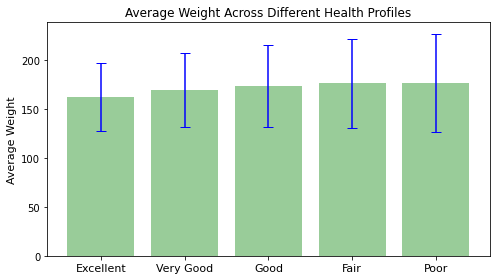

In [11]:
# Calculate mean and standard deviations.
excellent_mean, fair_mean, good_mean, poor_mean, very_good_mean = cdc.groupby(['genhlth']).agg({'weight':'mean'}).reset_index()['weight'].tolist()
excellent_std, fair_std, good_std, poor_std, very_good_std = cdc.groupby(['genhlth']).agg({'weight':'std'}).reset_index()['weight'].tolist()

# Define labels, positions, bar heights and error bar heights
labels = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
x_pos = np.arange(len(labels))
avgs = [excellent_mean, very_good_mean, good_mean, fair_mean, poor_mean]
error = [excellent_std, very_good_std, good_std, fair_std, poor_std]

# Build the plot
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(x_pos, avgs, yerr=error, align='center', alpha=0.4, ecolor='blue', color='green', capsize=5)
ax.set_ylabel('Average Weight', fontsize=11)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=11)
ax.set_title('Average Weight Across Different Health Profiles', fontsize=12)
plt.tight_layout()
plt.show()

So what conclusions can be drawn? Error bars can indicate about statistical significance.<br>
A statisticall significance means that the results are most likely not due to chance or sampling error. In any observation that involves sampling from a population, there is always the possibility that an observed effect would have occurred due to sampling error.  But if the result is significant, then the researcher may conclude that the observed effect actually reflects the characteristics of the population rather than just sampling error or chance.  

​The standard deviation error bars on a graph can be used to get a sense for whether or not a difference is significant. So how do we do that? It is by looking for the overlap between the standard deviation bars.
- When standard deviation errors bars overlap, even for a bit, it is a clue that the difference is not statistically significant. The mean from one group is not different from another.
- When standard deviation error bars do not overlap, it is a clue that the difference may be significant. The mean from one group is different from another.

<img src="overlap_bars.png" alt="image info" />

So going back to our example, looking at the error bars, there is not a single overlap between the health groups (excellent, very good, good, fair, and poor). And thus we may conclude that:
- There is no differencce between average weight across the health groups.
- An adult having excellent heath condition doesnt always weigh less than others who have less than excellent health condition.

But just to be sure, you must actually perform statistical tests such as t-test or ANOVA (compare the means between the groups) to support your conclusion

To summarize:
- Error bars on a graph visually help us to determine the error or uncertainty in our data, and thus improve our confidence in making a decision/conclusion.
- There are 3 common statistics that are used to overlay error bars on a graph: standard deviation, standard error, and confidence interval.
- A short error bar indicates the data are clumped around the mean, while the long bar indicates the data are spread out from the mean.
- While error bars can give us a clue whether a difference is significant in our data, it is advisable to perform a statistical test to further verify our assumption.